In [1]:
# Liczba znaków na stronie głównej portalu lubimyczytać.pl
import requests
r=requests.get("https://lubimyczytac.pl")
print("Strona lubimyczytać ma długość", len(r.text), "znaków")

Strona lubimyczytać ma długość 249177 znaków


In [2]:
# Pobranie i zapisanie do pliku CSV tytułu, autora, liczby ocen i średniej ocen książek najczęściej ocenianych na portalu lubimyczytać.pl
# Dane zebrane z pierwszych 10 stron katalogu

from bs4 import BeautifulSoup
import pandas as pd
fileBooks = open("najczesciejOceniane.csv", "w", encoding="utf-8")
for i in range (0,10):
    r= requests.get("https://lubimyczytac.pl/katalog?page="+ str(i) + "&listId=booksFilteredList&rating[]=0&rating[]=10&publishedYear[]=1200&publishedYear[]=2022&catalogSortBy=ratings-desc&paginatorType=Standard")
    soup= BeautifulSoup(r.text, 'html.parser')
    tytuły = soup.findAll('a', attrs={'class':'authorAllBooks__singleTextTitle float-left'})
    autorzy = soup.findAll('div', attrs={'class':'authorAllBooks__singleTextAuthor authorAllBooks__singleTextAuthor--bottomMore'})
    sredniaOcen = soup.findAll('span', attrs={'class' : 'listLibrary__ratingStarsNumber'})
    liczbaOcen = soup.findAll('div', attrs={'class' : 'listLibrary__ratingAll'})
    czytelnicy = soup.findAll('span', attrs={'class' : 'small grey mr-2 mb-3'})
    opinie = soup.findAll('span', attrs={'class' : 'ml-2 small grey'})
    for tytuł, autor, srednia, liczba, czytelnik, opinia in zip(tytuły, autorzy, sredniaOcen, liczbaOcen, czytelnicy, opinie):
        fileBooks.write(tytuł.text.strip() + ';' + autor.text.strip() + ';' + srednia.text.strip() + ';'
                        + liczba.text.strip().replace("ocen","")+ ';' + czytelnik.text.strip().replace("Czytelnicy:","")
                        + ';' + opinia.text.strip().replace("Opinie:","") + '\n')
fileBooks.close()

# Pierwsze 15 tytułów z pliku najczesciejOceniane wraz z autorami, danymi o ocenach, wyświetlone w formie numerowanej kolumny z nagłówkami
df = pd.read_csv("najczesciejOceniane.csv",on_bad_lines="skip", delimiter=";", encoding="utf8")
df.columns=['Tytuł', 'Autor','Średnia', 'Liczba','Czytelnicy','Opinie']
df.head(15)


,Tytuł,Autor,Średnia,Liczba,Czytelnicy,Opinie
0,Harry Potter i Komnata Tajemnic,J.K. Rowling,"8,3",67099,100288,2106
1,Harry Potter i więzień Azkabanu,J.K. Rowling,"8,6",64576,97010,2063
2,Harry Potter i Czara Ognia,J.K. Rowling,"8,5",61598,93469,1743
3,Mały Książę. Wydanie ekskluzywne,Antoine de Saint-Exupéry,"8,0",61074,88215,4034
4,Harry Potter i Zakon Feniksa,J.K. Rowling,"8,5",57430,87798,1568
5,Harry Potter i Książę Półkrwi,J.K. Rowling,"8,6",56214,86019,1439
6,Harry Potter i Insygnia Śmierci,J.K. Rowling,"8,6",55835,85522,2007
7,Mistrz i Małgorzata,Michaił Bułhakow,"8,4",49420,85024,3021
8,Cień wiatru,Carlos Ruiz Zafón,"8,2",45895,81719,4390
9,Igrzyska śmierci,Suzanne Collins,"8,1",44947,70434,4277


In [3]:
# Zliczenie sumy tytułów zebranych w pliku csv
df.Tytuł.count()

299

In [4]:
# 15 tytułów z pliku najczesciejOceniane z największą średnią wartością ocen, wraz z autorami, danymi o ocenach, wyświetlone w formie numerowanej kolumny z nagłówkami
#Według średniej od najwyższej
import pandas as pd
df = pd.read_csv("najczesciejOceniane.csv",on_bad_lines="skip", delimiter=";", encoding="utf8")
df.columns=['Tytuł', 'Autor','Średnia', 'Liczba','Czytelnicy','Opinie']
df.sort_values(by=['Średnia'], ascending=False).head(15)

,Tytuł,Autor,Średnia,Liczba,Czytelnicy,Opinie
127,Władca Pierścieni,J.R.R. Tolkien,"8,8",18210,30535,986
74,Powrót Króla,J.R.R. Tolkien,"8,7",27350,44763,632
93,Ojciec chrzestny,Mario Puzo,"8,7",22417,38246,1437
31,Harry Potter i więzień Azkabanu,J.K. Rowling,"8,6",64576,97010,2063
36,Harry Potter i Insygnia Śmierci,J.K. Rowling,"8,6",55835,85522,2007
84,Złodziejka książek,Markus Zusak,"8,6",23905,53041,3337
5,Harry Potter i Książę Półkrwi,J.K. Rowling,"8,6",56214,86019,1439
6,Harry Potter i Insygnia Śmierci,J.K. Rowling,"8,6",55835,85522,2007
35,Harry Potter i Książę Półkrwi,J.K. Rowling,"8,6",56214,86019,1439
1,Harry Potter i więzień Azkabanu,J.K. Rowling,"8,6",64576,97010,2063


In [5]:
# Książki z najniższą średnią z pliku CSV, rosnąco
df.sort_values(['Średnia']).head(10)

,Tytuł,Autor,Średnia,Liczba,Czytelnicy,Opinie
211,Syzyfowe prace,Stefan Żeromski,"5,3",12437,22449,489
181,Kordian,Juliusz Słowacki,"5,5",14084,24565,457
255,Na brzegu rzeki Piedry usiadłam i płakałam...,Paulo Coelho,"5,7",11100,17977,501
129,Antygona,Sofokles,"5,9",17800,31099,515
49,Pięćdziesiąt twarzy Greya,E. L. James,"5,9",37434,54506,4504
72,Alchemik,Paulo Coelho,"5,9",27764,42405,1892
233,Skąpiec,Molier,"5,9",11759,20692,432
186,Latarnik,Henryk Sienkiewicz,"5,9",13855,24814,402
19,Pięćdziesiąt twarzy Greya,E. L. James,"5,9",37434,54506,4504
166,Ludzie bezdomni,Stefan Żeromski,"6,0",14916,26175,485


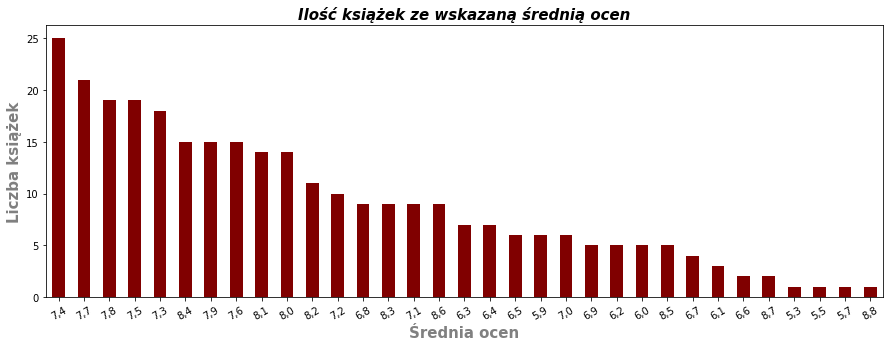

In [6]:
# Ile jest książek ze wskazaną średnią 
# Stworzenie wykresu słupkowego - nadanie mu tytułu,
# Nadanie tytułów osi x i y - uporządkowanie rosnąco (Widać, że najczęściej występująca średnia ocen to 7,8)
# Zmiana koloru słupków, czcionek
import matplotlib.pyplot as plt

df = pd.read_csv("najczesciejOceniane.csv",on_bad_lines="skip", delimiter=";", encoding="utf8")
df.columns=['Tytuł', 'Autor','Średnia', 'Liczba','Czytelnicy','Opinie']
scoring = df.groupby("Średnia")
plt.figure(figsize=(15,5))
scoring.size().sort_values(ascending=False).plot.bar(color ='maroon')

plt.xticks(rotation=30) #rotacja labeli w osi x
plt.xlabel("Średnia ocen", fontweight ='bold', fontsize = 15, color='grey')
plt.ylabel("Liczba książek", fontweight ='bold', fontsize = 15, color='grey')
plt.title("Ilość książek ze wskazaną średnią ocen",fontweight ='bold',
          fontsize = 15,style='italic')

#Zapisanie wykresu do pliku png i wyświetlenie go
plt.savefig('WykresKsiazki.png',dpi=300, bbox_inches='tight')
plt.show()


In [7]:
#Wyświetlenie w formie tabeli wszystkich tytułów książek z pliku, które zawierają frazę "Harry"
Harry = df.query('Tytuł.str.contains("Harry")', engine='python')
Harry

,Tytuł,Autor,Średnia,Liczba,Czytelnicy,Opinie
0,Harry Potter i Komnata Tajemnic,J.K. Rowling,"8,3",67099,100288,2106
1,Harry Potter i więzień Azkabanu,J.K. Rowling,"8,6",64576,97010,2063
2,Harry Potter i Czara Ognia,J.K. Rowling,"8,5",61598,93469,1743
4,Harry Potter i Zakon Feniksa,J.K. Rowling,"8,5",57430,87798,1568
5,Harry Potter i Książę Półkrwi,J.K. Rowling,"8,6",56214,86019,1439
6,Harry Potter i Insygnia Śmierci,J.K. Rowling,"8,6",55835,85522,2007
29,Harry Potter i Kamień Filozoficzny,J.K. Rowling,"8,4",80449,119409,4806
30,Harry Potter i Komnata Tajemnic,J.K. Rowling,"8,3",67099,100288,2106
31,Harry Potter i więzień Azkabanu,J.K. Rowling,"8,6",64576,97010,2063
32,Harry Potter i Czara Ognia,J.K. Rowling,"8,5",61598,93469,1743


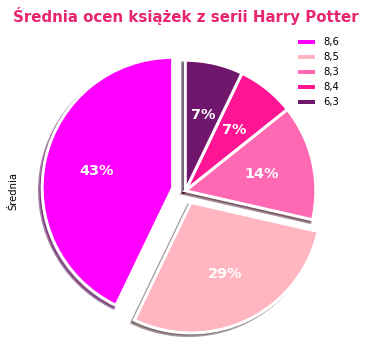

In [8]:
# Wizualizacja za pomocą pie chart
#Średnia ocen książek, które zawierają "Harry"
#Customowe kolory -  Wyszczególnienie (wycięcie) przez EXPLODE 2 największych wartości\

explode = [0.1, 0.1,0, 0, 0]
colors = ['fuchsia','lightpink','hotpink','deeppink', '#70166d','pink']
Harry['Średnia'].value_counts().plot.pie(colors = colors,
                                    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                                    textprops={'size': 'x-large','color':"w",'fontweight':'bold'},
                                    autopct='%1.0f%%',   
                                    explode=explode,
                                    shadow = True,
                                    startangle=90,
                                    figsize=(10,6))
plt.title("Średnia ocen książek z serii Harry Potter",fontweight ='bold', fontsize = 15,color='#e82570')

#Wyświetlenie legendy, bez ramki, wybranie pozycji
plt.legend(loc='best', frameon=False)
plt.show()


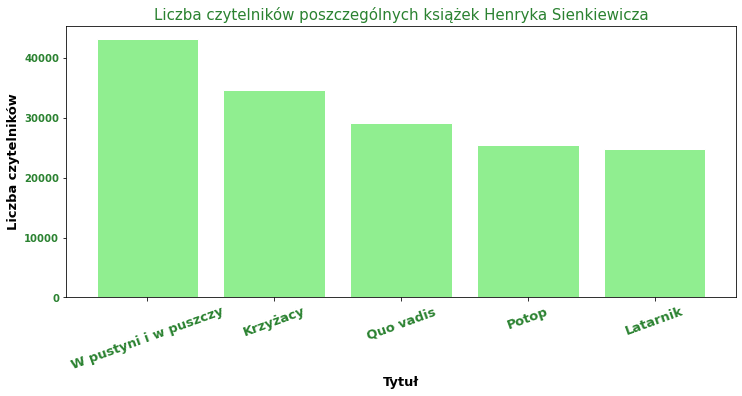

In [9]:
# Wizualizacja czytelników książek Sienkiewicza
#Znalezienie pozycji, napisanych przez HS
sienkiewiczBooks =df[(df['Autor']=='Henryk Sienkiewicz')].head()
sienkiewiczBooks

#Zdefiniowanie wartości osi X i Y
x = sienkiewiczBooks.Tytuł
y = sienkiewiczBooks.Czytelnicy
x_pos = [i for i, _ in enumerate(x)]

#Stworzenie wykresu, określienie jego wielkości, kolorów wizualizacji, czcionek, rotacji
plt.figure(figsize=(12,5))
plt.bar(x_pos, y, color='lightgreen', edgecolor='white')
plt.xticks(rotation=20, fontweight='bold', fontsize=13, color='#2b8231')
plt.yticks(fontweight ='bold',color='#2b8231')

plt.xlabel("Tytuł",fontweight ='bold', fontsize = 13)
plt.ylabel("Liczba czytelników", fontweight ='bold', fontsize = 13)

plt.title("Liczba czytelników poszczególnych książek Henryka Sienkiewicza",color='#2b8231',fontsize = 15)
plt.xticks(x_pos, x)

#Wyświetlenie i zapisanie do pliku png
plt.savefig('WykresSienkiewiczCzytelnicy.png',dpi=300, bbox_inches='tight')
plt.show()

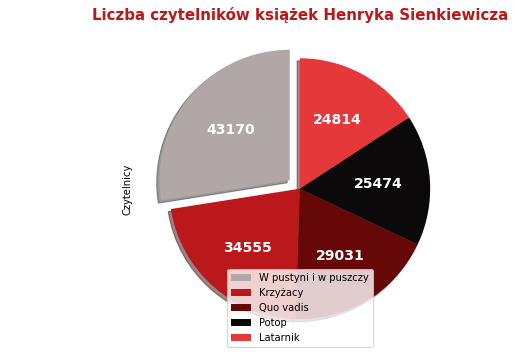

In [10]:
# Te same dane co powyżej - wykres kołowy
# Własne zdefiniowanie kolorów, wykorzystanie explode do najwyższej wartości
# Wyświetlenie szczegółowych wartości na wykresie
# Zamieszczenie legendy w centralnym punkcie i jej wyświetlenie
colors = ['#b1a7a6','#ba181b','#660708','#0b090a', '#e5383b']
mylabels = sienkiewiczBooks.Tytuł
explode = [0.1, 0,0, 0, 0]
sienkiewiczBooks['Czytelnicy'].plot.pie(labels=mylabels,
                                shadow = True,
                                colors=colors,
                                figsize=(6,6),
                                textprops={'size': 'x-large','color':"w",'fontweight':'bold'},
                                explode=explode,
                                startangle=90,
                                autopct=lambda p:f'{p*sum(sienkiewiczBooks.Czytelnicy)/100 :.0f}',
                                fontsize=14)
plt.title("Liczba czytelników książek Henryka Sienkiewicza",color='#ba181b',fontsize = 15,fontweight='bold')
plt.legend(loc='lower center')
plt.show()

In [11]:
#Znalezienie w pliku książek, których średnia ocen wynosi ponad 8,5
moreThan8 =df[df['Średnia']> '8,5'].head(10)
moreThan8

,Tytuł,Autor,Średnia,Liczba,Czytelnicy,Opinie
1,Harry Potter i więzień Azkabanu,J.K. Rowling,"8,6",64576,97010,2063
5,Harry Potter i Książę Półkrwi,J.K. Rowling,"8,6",56214,86019,1439
6,Harry Potter i Insygnia Śmierci,J.K. Rowling,"8,6",55835,85522,2007
31,Harry Potter i więzień Azkabanu,J.K. Rowling,"8,6",64576,97010,2063
35,Harry Potter i Książę Półkrwi,J.K. Rowling,"8,6",56214,86019,1439
36,Harry Potter i Insygnia Śmierci,J.K. Rowling,"8,6",55835,85522,2007
61,Drużyna Pierścienia,J.R.R. Tolkien,"8,6",32205,51411,1241
74,Powrót Króla,J.R.R. Tolkien,"8,7",27350,44763,632
84,Złodziejka książek,Markus Zusak,"8,6",23905,53041,3337
87,Zielona Mila,Stephen King,"8,6",23526,45680,1667


In [12]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: E:\an

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.0 MB

The following packages will be UPDATED:

  conda                               4.12.0-py39hcbf5309_0 --> 4.13.0-py39hcbf5309_1




conda-4.13.0         | 1.0 MB    |            |   0% 
conda-4.13.0         | 1.0 MB    | 1          |   2% 
conda-4.13.0         | 1.0 MB    | #2         |  12% 
conda-4.13.0         | 1.0 MB    | ##9        |  30% 
conda-4.13.0         | 1.0 MB    | ####2      |  42% 
conda-4.13.0         | 1.0 MB    | ######3    |  64% 
conda-4.13.0         | 1.0 MB    | #######6   |  76% 
con

1348 [(';', 300), ('i', 39), ('z', 16), ('harry', 15), ('potter', 15), ('w', 14), ('r.r.', 9), ('ruiz', 6), ('pan', 6), ('miasto', 5)]


(-0.5, 399.5, 199.5, -0.5)

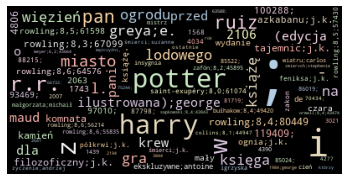

In [14]:
#Słowa kluczowe z pliku najczesciejOceniane
#Wyliczenie i wizualizacja - zmiana kolorów,
#ustawienie maksymalnej liczby słów (100) oraz maksymalnej wielkości czcionki - 80
f=open("najczesciejOceniane.csv", encoding='utf8')
keyWords=str(f.read()).lower()
f.close()
wordList=keyWords.split()
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
page_word_freq = Counter(wordList).most_common()
print(len(page_word_freq), page_word_freq[:10])
wordsDict={}
for i in page_word_freq:
    wordsDict[i[0]]=i[1]
wordcloud= WordCloud(max_words=100, colormap="Pastel1",background_color="black",max_font_size=80).fit_words(wordsDict)
plt.imshow(wordcloud)
plt.axis("off")

In [15]:
#Zdefiniowanie stop_words
stop_words=['w','i','o','z','co','się','to','od','na','nad','a','nie','-',
            'jak','do','and','the','of', 'ocen', 'r.r.',';']

Brak co
Brak to
Brak jak
Brak and
Brak the
Brak of
Brak ocen
1334 [('harry', 15), ('potter', 15), ('ruiz', 6), ('pan', 6), ('miasto', 5), ('więzień', 4), ('książę', 4), ('gra', 4), ('greya;e.', 4), ('l.', 4)]


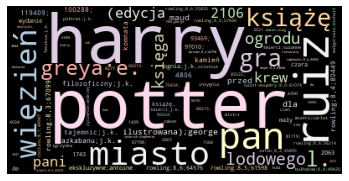

In [16]:
#Wyliczenie (10 najczęściej występujących) i wizualizacja z wykorzystaniem stop_wordsów-
#Wykorzystanie colormap
#ustawienie maksymalnej liczby słów (100) oraz maksymalnej wielkości czcionki - 80
#Zauważalna różnica w stosunku do poprzedniej wygenerowanej chmury
dict_page_word_freq = {}
for i in page_word_freq:
    dict_page_word_freq[i[0]]=i[1]
for s in stop_words:
    try:
        del dict_page_word_freq[s]
    except:
        print("Brak", s)
wordcloud = WordCloud(max_words=100,
                      colormap="Pastel1",background_color="black",max_font_size=80).fit_words(dict_page_word_freq)
plt.imshow(wordcloud)
plt.axis("off")
dict_page_word_freq2 = Counter(dict_page_word_freq).most_common()
print(len(dict_page_word_freq2), dict_page_word_freq2[:10])

In [17]:
# Zapisanie obrazu z wizualizacją słów kluczowych do pliku
wordcloud.to_file("BookWordcloud.png")

In [19]:
# Pobranie zdjęcia, które będzie stanowiło maskę - kształt grafiki z wizualizacją
# Pobranie niezbędnych bibliotek
import numpy as np
from PIL import Image
import collections
import matplotlib
maskable_image = np.array(Image.open('pngegg.png'))

| Harry | 14
| Potter | 14
| Pan | 6
| W | 5
| Miasto | 5
| Książę | 4
| śmierci | 4
| Gra | 4
| Greya | 4
| ognia | 4
| Lodowego | 4
| Ogrodu | 4
| księga | 4
| I | 4
| Mistrz | 3


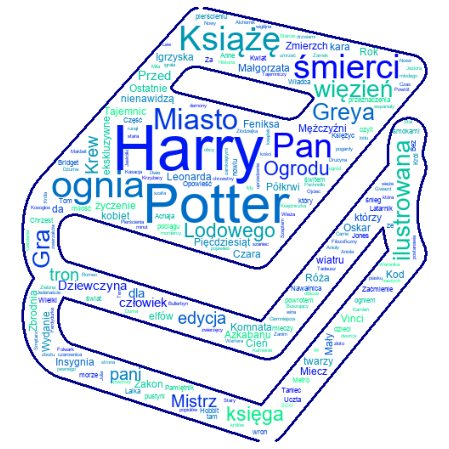

In [20]:
#Stworzenie wordclouda z TYTUŁÓW książek z pliku CSV, wizualizacja z użyciem maski - kontury książki
# Ustawienie konturów, kształtu, wielkośći i kolorystyki 
# Do kolorów wykorzystano zestaw kolorów wbudowany w bibliotekę matplotlib

titles = " ".join(title for title in df.Tytuł)
wordcloud = WordCloud(width = 1000, height = 500, random_state=1,
                      background_color='white', colormap=matplotlib.cm.winter,
                      collocations=False, stopwords = stop_words,
                      contour_width=3, contour_color='darkblue',
                      font_path='arial',
                      mask=maskable_image).generate(titles)
def plot_cloud(wordcloud):
    # Wielkość grafiki
    plt.figure(figsize=(15, 8))
    # Wyświetlenie grafiki
    plt.imshow(wordcloud) 
    # Usunięcie informacji o osiach
    plt.axis("off");
plot_cloud(wordcloud)

#Zapisanie grafiki jako plik png
wordcloud.to_file("book-wordcloud.png")

#Wyliczenie i wyświetlenie 15 najczęściej występujących słów w zwizualizowanych tytułach
titles = [word for word in titles.split() if word not in stop_words]
counted_words = collections.Counter(titles)
word_count = {}
for letter, count in counted_words.most_common(15):
    word_count[letter] = count
for i,j in word_count.items():
        print('| {0} | {1}'.format(i,j))

| Andrzej | 17
| J.K. | 16
| Rowling | 15
| Sapkowski | 14
| George | 12
| Stephen | 10
| King | 10
| Stephenie | 9
| Meyer | 9
| R.R. | 9
| Martin | 9
| Camilla | 8
| Läckberg | 8
| Dan | 7
| Brown | 7


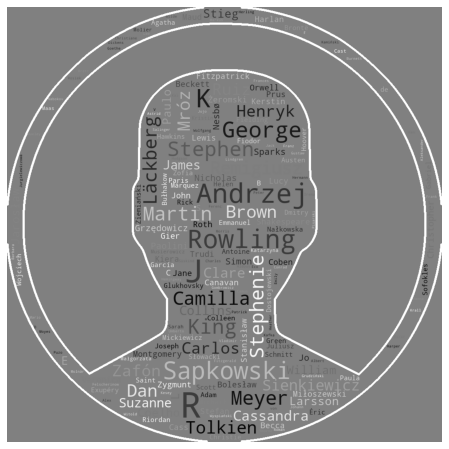

In [21]:
#Stworzenie wordclouda z autorów z pliku CSV, wizualizacja z użyciem maski
maskable_image_author = np.array(Image.open('face.png'))
authores = " ".join(authores for authores in df.Autor)

wordcloudAuth = WordCloud(width = 1000, height = 300, random_state=1,
                      background_color='grey',colormap=matplotlib.cm.binary, 
                      collocations=False, stopwords = stop_words,
                      contour_width=5, contour_color='white',
                      mask=maskable_image_author, max_font_size=80).generate(authores)
def plot_cloud(wordcloudAuth):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloudAuth) 
    plt.axis("off");
plot_cloud(wordcloudAuth)

#Zapisanie obrazu chmury do pliku png
wordcloudAuth.to_file("author-wordcloud.png")

#Wyliczenie i wyświetlenie 15 najczęściej występujących słów w zwizualizowanych autorach
authores = [word for word in authores.split() if word not in stop_words]
counted_words = collections.Counter(authores)
word_count = {}
for letter, count in counted_words.most_common(15):
    word_count[letter] = count
for i,j in word_count.items():
        print('| {0} | {1}'.format(i,j))

In [24]:
#Scrapowanie kategorii
#Wypisanie najpierw najpopularniejszych kategorii książek a 
#następnie pozostałych kategorii i zapisanie tej listy w pliku csv
#Zadbanie o to aby każda nazwa kategorii zaczynała się od wielkiej litery
from bs4 import BeautifulSoup
fileBooks = open("Kategorie.csv", "w", encoding="utf-8")
r= requests.get("https://lubimyczytac.pl/katalog")
soup= BeautifulSoup(r.text, 'html.parser')
categories = soup.findAll('div', attrs={'class':'filtrItemTypeOfCategory filtr__itemTitle filtr__itemTitle--arrow filtr__itemTitleUnstyled filtr__itemTitle--mobile-no-mb'})
otherCategories =soup.findAll('div', attrs={'class':'filtr__itemTitle filtr__itemTitle--subCat filtr__itemTitleUnstyled filtr__itemTitle--mobile-no-mb js-item-subcat'})
print("Najpopularniejsze kategorie:")
for category in categories:
    print(category.text.strip())
    fileBooks.write(category.text.strip() +'\n')
print("Pozostałe kategorie:")
for otherC in otherCategories:
    print(otherC.text.strip().capitalize())
    fileBooks.write(otherC.text.strip()+ '\n')
fileBooks.close()

Najpopularniejsze kategorie:
Beletrystyka
Literatura faktu
Literatura popularnonaukowa
Literatura dziecięca
Komiksy
Poezja, dramat, satyra
Pozostałe
Pozostałe kategorie:
Fantasy, science fiction
Horror
Klasyka
Kryminał, sensacja, thriller
Literatura młodzieżowa
Literatura obyczajowa, romans
Literatura piękna
Powieść historyczna
Powieść przygodowa
Biografia, autobiografia, pamiętnik
Reportaż
Literatura podróżnicza
Publicystyka literacka, eseje
Astronomia, astrofizyka
Biznes, finanse
Encyklopedie, słowniki
Filozofia, etyka
Flora i fauna
Historia
Informatyka, matematyka
Językoznawstwo, nauka o literaturze
Nauki przyrodnicze (fizyka, chemia, biologia, itd.)
Nauki społeczne (psychologia, socjologia, itd.)
Popularnonaukowa
Poradniki dla rodziców
Technika
Zdrowie, medycyna
Bajki
Baśnie, legendy, podania
Historie biblijne
Interaktywne, obrazkowe, edukacyjne
Literatura dziecięca
Opowiadania, powieści dla dzieci
Opowieści dla młodszych dzieci
Popularnonaukowa dziecięca
Pozostałe
Wierszyki, piose

In [22]:
#Z pliku csv stworzonego powyżej obliczenie sumy kategorii
bookcategories = pd.read_csv("Kategorie.csv",on_bad_lines="skip", delimiter=";", encoding="utf8")
bookcategories.columns=['Kategorie']
print("Liczba kategorii książek dostępnych na portalu lubimyczytać:")
bookcategories.Kategorie.count()

Liczba kategorii książek dostępnych na portalu lubimyczytać:


65

In [27]:
# Scraping
#Pobranie i zapisanie do pliku cytatów z 2 stron wraz z autorami i ksiazkami
from bs4 import BeautifulSoup
quoteBooks = open("cytaty.csv", "w", encoding="utf-8")
for i in range (1,2):
    r= requests.get("https://lubimyczytac.pl/cytaty?page="+ str(i) + "&listId=quoteListFull&tab=All&phrase=&sortBy=popular&paginatorType=Standard")
    soup= BeautifulSoup(r.text, 'html.parser')
    trescCytatow = soup.findAll('div', attrs={'class':'collapse-content'})
    autorzyCytatow = soup.findAll('a', attrs={'class':'quotes__singleAuthor--author'})
    ksiazkiCytatow = soup.findAll('a', attrs={'class':'quotes__singleAuthor--book'})
    for tresc, autor, ksiazka in zip(trescCytatow, autorzyCytatow, ksiazkiCytatow):
        quoteBooks.write(tresc.text.strip() + ';' + autor.text.strip() + ';' + ksiazka.text.strip()+ '\n')
quoteBooks.close()
dfQ = pd.read_csv("cytaty.csv",on_bad_lines="skip", delimiter=";", encoding="utf8")
dfQ.columns=['Cytat','Autor','Ksiazka']

# fillna - funkcja pozwala zamieniać wartość Nan na dowolny string
dfQ.head(15).fillna('-----')

,Cytat,Autor,Ksiazka
0,"Lepiej zaliczać się do niektórych, niż do wszy...",Andrzej Sapkowski,Cień wiatru
1,"Czytanie książek to najpiękniejsza zabawa, jak...",Wisława Szymborska,Mały Książę
2,Książki są lustrem: widzisz w nich tylko to co...,Carlos Ruiz Zafón,Mistrz i Małgorzata
3,Dobrze widzi się tylko sercem. Najważniejsze j...,Antoine de Saint-Exupéry,Cień wiatru
4,– To wódka? – słabym głosem zapytała Małgorzat...,-----,-----
5,"– Na litość boską, królowo – zachrypiał – czy ...",Michaił Bułhakow,Kubuś Puchatek
6,"W chwili, kiedy zastanawiasz się czy kogoś koc...",Carlos Ruiz Zafón,Nic dwa razy: Wybór wierszy - Nothing Twice: S...
7,- A jeśli pewnego dnia będę musiał odejść? - s...,-----,-----
8,- Nic wielkiego. - zapewnił go Puchatek. - Pos...,Alan Alexander Milne,Alchemik


| sobie | 2
| tylko | 2
| czy | 2
| kogoś | 2
| go | 2


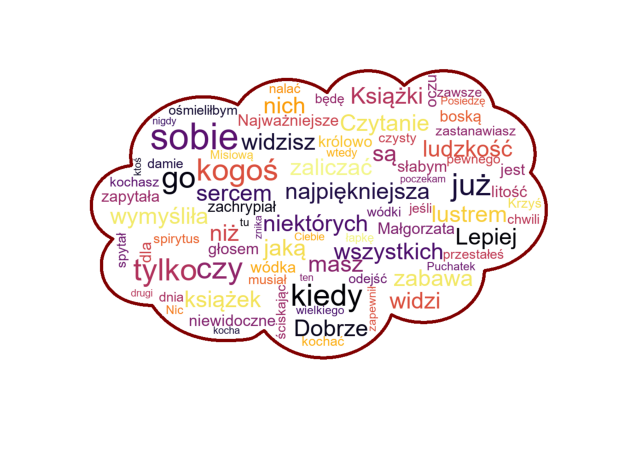

In [28]:
#Stworzenie wordclouda z CYTATÓW z pliku CSV, wizualizacja z użyciem maski
#Użycie colormap z biblioteki matplotlib - kolorystyka inferno

maskable_image_quote = np.array(Image.open('cloud.png'))
quotes = " ".join(quotes for quotes in dfQ.Cytat)
wordcloudQuotes = WordCloud(width = 1000, height = 500, random_state=1,
                      background_color='white',colormap=matplotlib.cm.inferno,
                            font_path='arial',
                      collocations=False, stopwords = stop_words,
                      contour_width=10, contour_color='maroon',
                      mask=maskable_image_quote, max_font_size=80).generate(quotes)
def plot_cloud(wordcloudQuotes):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloudQuotes) 
    plt.axis("off");
plot_cloud(wordcloudQuotes)
wordcloudQuotes.to_file("quotes-wordcloud.png")

#Zdefiniowanie nowych stopwordsów na potrzeby pliku z cytatami
#Wyliczenie i wypisanie 5 najczęściej występujących słów w cytatach
stopWords=set(['To','-','się','do','w','i','to','już','–'])
quotes = [word for word in quotes.split() if word not in stopWords]
counted_words = collections.Counter(quotes)
word_count = {}
for letter, count in counted_words.most_common(5):
    word_count[letter] = count
for i,j in word_count.items():
        print('| {0} | {1}'.format(i,j))

In [29]:
# Przeszukanie pliku CSV
#Dwa warunki wyszukiwania - książki Stephena Kinga, które sa ocenione na mniej niż 8 gwiazdek
kingBooks =df[(df['Średnia']< '8') & (df['Autor']=='Stephen King')].head()
kingBooks

,Tytuł,Autor,Średnia,Liczba,Czytelnicy,Opinie
104,Smętarz dla zwierzaków,Stephen King,"7,5",20769,36423,1812
112,Carrie,Stephen King,"7,0",19394,32718,1415
136,Miasteczko Salem,Stephen King,"7,4",17397,30888,1197
155,Misery,Stephen King,"7,7",16212,27927,1273
232,To,Stephen King,"7,7",11878,27418,1285


In [30]:
#Zapisanie powyżej zebranych danych do pliku XLSX
kingBooks.to_excel("kingBooks.xlsx")

In [31]:
# Import biblioteki MongoDB
# Definiowanie obieektu klienta i podłączenie do serwera na porcie 27017
from pymongo import MongoClient
import pymongo
client= MongoClient('mongodb://localhost:27017')
#Tworzenie bazy
bd=client['BazaProjekt']
kolekcja=bd.projekt


In [34]:
#Import do bazy danych z pliku XLSX
df4=pd.read_excel("kingBooks.xlsx")
df4.head()
for index, row in df4.iterrows():
    dokument={
        'Tytuł':row['Tytuł'],
        'Autor':row['Autor'],
        'Średnia':row['Średnia'],
        'Liczba':row['Liczba'],
        'Czytelnicy':row['Czytelnicy'],
        'Opinie':row['Opinie']
    }
    rezultat=kolekcja.insert_one(dokument)
    print('Wstawiono:', rezultat.inserted_id)
print("Zakończono")
    

Wstawiono: 62966e026c3bfc2416120bda
Wstawiono: 62966e026c3bfc2416120bdb
Wstawiono: 62966e026c3bfc2416120bdc
Wstawiono: 62966e026c3bfc2416120bdd
Wstawiono: 62966e026c3bfc2416120bde
Zakończono


In [35]:
# Wyświetlenie wszystkim danych znajdujących się w kolekcji
wynik = kolekcja.find({})
for w in wynik:
    print(w)

{'_id': ObjectId('629641833ebce34ffbac5aed'), 'Tytuł': 'Smętarz dla zwierzaków', 'Autor': 'Stephen King', 'Średnia': '7,5', 'Liczba': 20769, 'Czytelnicy': 36423, 'Opinie': 1812}
{'_id': ObjectId('629641833ebce34ffbac5aee'), 'Tytuł': 'Carrie', 'Autor': 'Stephen King', 'Średnia': '7,0', 'Liczba': 19394, 'Czytelnicy': 32718, 'Opinie': 1415}
{'_id': ObjectId('629641833ebce34ffbac5aef'), 'Tytuł': 'Miasteczko Salem', 'Autor': 'Stephen King', 'Średnia': '7,4', 'Liczba': 17397, 'Czytelnicy': 30888, 'Opinie': 1197}
{'_id': ObjectId('629641833ebce34ffbac5af0'), 'Tytuł': 'Misery', 'Autor': 'Stephen King', 'Średnia': '7,7', 'Liczba': 16212, 'Czytelnicy': 27927, 'Opinie': 1273}
{'_id': ObjectId('62965524d6ad7e283684d540'), 'Tytuł': 'Smętarz dla zwierzaków', 'Autor': 'Stephen King', 'Średnia': '7,5', 'Liczba': 20769, 'Czytelnicy': 36423, 'Opinie': 1812}
{'_id': ObjectId('62965524d6ad7e283684d541'), 'Tytuł': 'Carrie', 'Autor': 'Stephen King', 'Średnia': '7,0', 'Liczba': 19394, 'Czytelnicy': 32718, 'O

In [36]:
# Wyszukanie w kolekcji książki o konkretnym tytule - "TO"
wynik = kolekcja.find({'Tytuł': 'To'})
for w in wynik:
    print(w)

{'_id': ObjectId('62966df56c3bfc2416120bd9'), 'Tytuł': 'To', 'Autor': 'Stephen King', 'Średnia': '7,7', 'Liczba': 11878, 'Czytelnicy': 27418, 'Opinie': 1285}
{'_id': ObjectId('62966e026c3bfc2416120bde'), 'Tytuł': 'To', 'Autor': 'Stephen King', 'Średnia': '7,7', 'Liczba': 11878, 'Czytelnicy': 27418, 'Opinie': 1285}


In [37]:
kolekcja.insert_one({'Tytuł':'Joyland','Autor':'Stephen King', 'Średnia': '8,9',
                   'Liczba':'12000', 'Czytelnicy':'14100','Opinie':'1000'})

In [38]:
# Wstawienie dwóch tytułów do kolekcji
kolekcja.insert_many( [
     {'Tytuł':'Podpalaczka','Autor':'Stephen King', 'Średnia': '4,3',
                   'Liczba':'12410', 'Czytelnicy':'19000','Opinie':'1040'},
      {'Tytuł':'Bastion','Autor':'Stephen King', 'Średnia': '6,8',
                   'Liczba':'15000', 'Czytelnicy':'28010','Opinie':'1100'}
   ] );

In [58]:
# Wyświetlenie wszystkim danych znajdujących się w kolekcji
wynik = kolekcja.find({})
for w in wynik:
    print(w)

{'_id': ObjectId('629641833ebce34ffbac5aed'), 'Tytuł': 'Smętarz dla zwierzaków', 'Autor': 'Stephen King', 'Średnia': '7,5', 'Liczba': 20769, 'Czytelnicy': 36423, 'Opinie': 1812}
{'_id': ObjectId('62965524d6ad7e283684d540'), 'Tytuł': 'Smętarz dla zwierzaków', 'Autor': 'Stephen King', 'Średnia': '7,5', 'Liczba': 20769, 'Czytelnicy': 36423, 'Opinie': 1812}
{'_id': ObjectId('62965674d6ad7e283684d546'), 'Tytuł': 'Smętarz dla zwierzaków', 'Autor': 'Stephen King', 'Średnia': '7,5', 'Liczba': 20769, 'Czytelnicy': 36423, 'Opinie': 1812}
{'_id': ObjectId('629657d5d6ad7e283684d54c'), 'Tytuł': 'Instytut', 'Autor': 'Stephen King', 'Średnia': '8,9', 'Liczba': '12000', 'Czytelnicy': '14100', 'Opinie': '1000'}
{'_id': ObjectId('629657d5d6ad7e283684d54d'), 'Tytuł': 'Instytut', 'Autor': 'Stephen King', 'Średnia': '8,9', 'Liczba': '12000', 'Czytelnicy': '14100', 'Opinie': '1000'}
{'_id': ObjectId('62966df56c3bfc2416120bd5'), 'Tytuł': 'Smętarz dla zwierzaków', 'Autor': 'Stephen King', 'Średnia': '7,5', 'L

In [40]:
# Zamiana wszystkich pozycji, które mają tytuł Joyland na tytuł Instytut
kolekcja.update_many({'Tytuł':'Joyland'}, {'$set':{'Tytuł':'Instytut'}})

In [57]:
#Usunięcie z kolekcji dokumentów, którego tytuł to "TO"
myquery = { 'Tytuł':'To' }
kolekcja.delete_many(myquery) 

In [59]:
# Wyświetlenie danych z kolekcji posortowanych według średniej rosnąco
mydoc = kolekcja.find().sort("Średnia")
for x in mydoc:
    print(x) 

{'_id': ObjectId('629641833ebce34ffbac5aed'), 'Tytuł': 'Smętarz dla zwierzaków', 'Autor': 'Stephen King', 'Średnia': '7,5', 'Liczba': 20769, 'Czytelnicy': 36423, 'Opinie': 1812}
{'_id': ObjectId('62965524d6ad7e283684d540'), 'Tytuł': 'Smętarz dla zwierzaków', 'Autor': 'Stephen King', 'Średnia': '7,5', 'Liczba': 20769, 'Czytelnicy': 36423, 'Opinie': 1812}
{'_id': ObjectId('62965674d6ad7e283684d546'), 'Tytuł': 'Smętarz dla zwierzaków', 'Autor': 'Stephen King', 'Średnia': '7,5', 'Liczba': 20769, 'Czytelnicy': 36423, 'Opinie': 1812}
{'_id': ObjectId('62966df56c3bfc2416120bd5'), 'Tytuł': 'Smętarz dla zwierzaków', 'Autor': 'Stephen King', 'Średnia': '7,5', 'Liczba': 20769, 'Czytelnicy': 36423, 'Opinie': 1812}
{'_id': ObjectId('62966e026c3bfc2416120bda'), 'Tytuł': 'Smętarz dla zwierzaków', 'Autor': 'Stephen King', 'Średnia': '7,5', 'Liczba': 20769, 'Czytelnicy': 36423, 'Opinie': 1812}
{'_id': ObjectId('62966e026c3bfc2416120bde'), 'Tytuł': 'To', 'Autor': 'Stephen King', 'Średnia': '7,7', 'Liczb